In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Seed for reproducibility
np.random.seed(42)

# Number of samples
n = 200

# Create synthetic data
df = pd.DataFrame({
    'visible_minority': np.random.choice([0, 1], size=n, p=[0.7, 0.3]),  # 30% visible minorities
    'tenure': np.random.choice([0, 1], size=n, p=[0.5, 0.5]),            # 50% tenure status
    'age': np.random.randint(25, 70, size=n),
    'gender': np.random.choice(['Male', 'Female'], size=n, p=[0.6, 0.4]),
    'evaluation_score': np.round(np.random.uniform(1, 5, size=n), 2)
})

# Let's assume visible minorities have slightly less tenure probability
df.loc[df['visible_minority'] == 1, 'tenure'] = np.random.choice([0, 1],
                                    size=df[df['visible_minority'] == 1].shape[0],
                                    p=[0.6, 0.4])


1. Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?

In [6]:
# Percentage of visible minorities who are tenured
visible_minority = df[df['visible_minority'] == 1]
num_visible_minority_tenured = visible_minority['tenure'].sum()
total_visible_minority = len(visible_minority)
percentage_visible_minority_tenured = (num_visible_minority_tenured / total_visible_minority) * 100
print(f"Percentage of visible minorities who are tenured: {percentage_visible_minority_tenured:.2f}%")

# Contingency table for tenure and visible minority
contingency = pd.crosstab(df['visible_minority'], df['tenure'])
print("\nContingency Table:")
print(contingency)

# Chi-square test
chi2, p, _, _ = chi2_contingency(contingency)
print(f"\nChi-square test p-value: {p:.4f}")

if p < 0.05:
    print("Tenure status differs significantly by visible minority status.")
else:
    print("No significant difference in tenure status by visible minority status.")


Percentage of visible minorities who are tenured: 36.67%

Contingency Table:
tenure             0   1
visible_minority        
0                 62  78
1                 38  22

Chi-square test p-value: 0.0206
Tenure status differs significantly by visible minority status.


2. Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.

In [7]:
age_stats = df.groupby('tenure')['age'].agg(['mean', 'std'])
print("\nAge statistics by tenure status:")
print(age_stats)



Age statistics by tenure status:
         mean        std
tenure                  
0       46.34  12.287154
1       46.59  13.466828


3. Which graph works better and plot that graph for the age variable?

<Figure size 800x500 with 0 Axes>

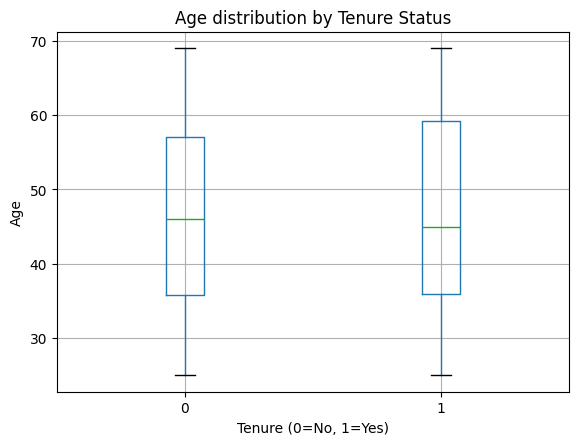

In [8]:
plt.figure(figsize=(8,5))
df.boxplot(column='age', by='tenure')
plt.title('Age distribution by Tenure Status')
plt.suptitle('')
plt.xlabel('Tenure (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()


4. Define the difference between pyplot.bar and pyplot.barh. Also plot the graph for gender variable.

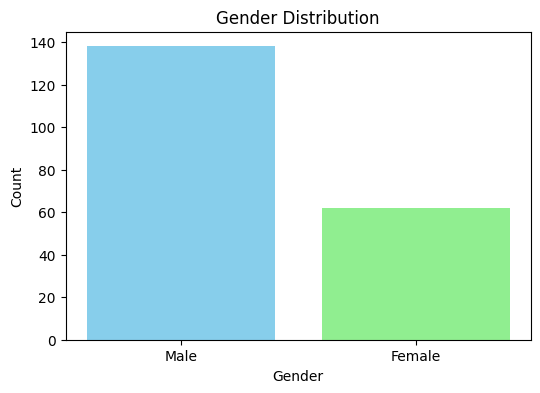

In [9]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightgreen'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


5. What is the Median evaluation score for tenured Professors?

In [10]:
median_eval_tenured = df[df['tenure'] == 1]['evaluation_score'].median()
print(f"\nMedian evaluation score for tenured professors: {median_eval_tenured}")



Median evaluation score for tenured professors: 3.0149999999999997
